In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visualize as vis

In [41]:
def generate_volume_with_sphere(nx, ny, nz, dx, dy, dz, r, center_x, center_y, center_z):
    Z, Y, X = np.mgrid[0:nz, 0:ny, 0:nx]
    distances = np.sqrt(((X - center_x)*dx)**2 +
                         ((Y - center_y)*dy)**2 +
                         ((Z - center_z)*dz)**2)
    normalized_distances = 1 - distances/r
    volume = np.where(distances <= r, normalized_distances, 0)
    return volume


def generate_volume_with_ellipsoid(nx, ny, nz, dx, dy, dz, rx, ry, rz, center_x, center_y, center_z):
    Z, Y, X = np.mgrid[0:nz, 0:ny, 0:nx]
    distances = np.sqrt(((X - center_x)*dx/rx)**2 +
                         ((Y - center_y)*dy/ry)**2 +
                         ((Z - center_z)*dz/rz)**2)

    normalized_distances = 1 - distances
    volume = np.where(distances <= 1, normalized_distances, 0)
    return volume


def generate_bead(nx, ny, nz, dx, dy, dz, num_spheres, num_ellipsoids, r_range):
    volume = np.zeros((nz, ny, nx))
    for _ in range(num_spheres):
        center_x = np.random.randint(0, nx)
        center_y = np.random.randint(0, ny)
        center_z = np.random.randint(0, nz)
        r = np.random.uniform(r_range[0], r_range[1])
        sphere_volume = generate_volume_with_sphere(nx, ny, nz, dx, dy, dz, r, center_x, center_y, center_z)
        volume = np.maximum(volume, sphere_volume)
    for _ in range(num_ellipsoids):
        center_x = np.random.randint(0, nx)
        center_y = np.random.randint(0, ny)
        center_z = np.random.randint(0, nz)
        rx = np.random.uniform(r_range[0], r_range[1])
        ry = np.random.uniform(r_range[0], r_range[1])
        rz = np.random.uniform(r_range[0], r_range[1])
        sphere_volume = generate_volume_with_ellipsoid(nx, ny, nz, dx, dy, dz, rx, ry, rz, center_x, center_y, center_z)
        volume = np.maximum(volume, sphere_volume)
    return volume

In [3]:
# nx, ny, nz = 100, 100, 100
# dx, dy, dz = 1, 1, 1 #micrometers
# r = 30 # radius in micrometers
# center_x, center_y, center_z = nx//3, ny//3, nz//3

# bead = generate_volume_with_sphere(nx, ny, nz, dx, dy, dz, r, center_x, center_y, center_z)

In [36]:
# nx, ny, nz = 100, 100, 100
# dx, dy, dz = 1, 1, 1 #micrometers
# rx, ry, rz = 30, 10, 5 # radius in micrometers
# center_x, center_y, center_z = nx//2, ny//3, nz//3

# bead = generate_volume_with_ellipsoid(nx, ny, nz, dx, dy, dz, rx, ry, rz, center_x, center_y, center_z)

In [50]:
nx, ny, nz = 100, 100, 100
dx, dy, dz = 1, 1, 1 #micrometers
num_spheres = 2
num_ellipsoids = 3
r_range = (5,25)

bead = generate_bead(nx, ny, nz, dx, dy, dz, num_spheres, num_ellipsoids, r_range)

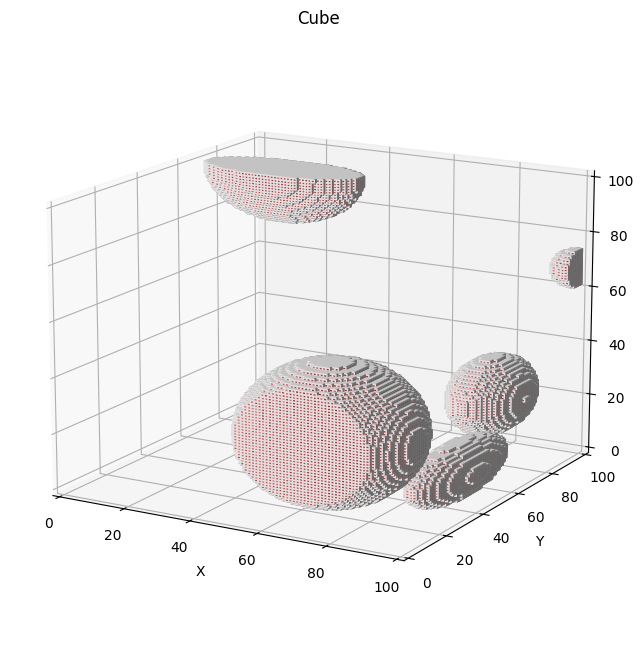

In [51]:
# Create 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.voxels(bead, facecolors='red', edgecolors='white', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cube')

ax.set_xlim(0, nx)
ax.set_ylim(0, ny)
ax.set_zlim(0, nz)

ax.view_init(elev=15, azim=-60)
plt.show()

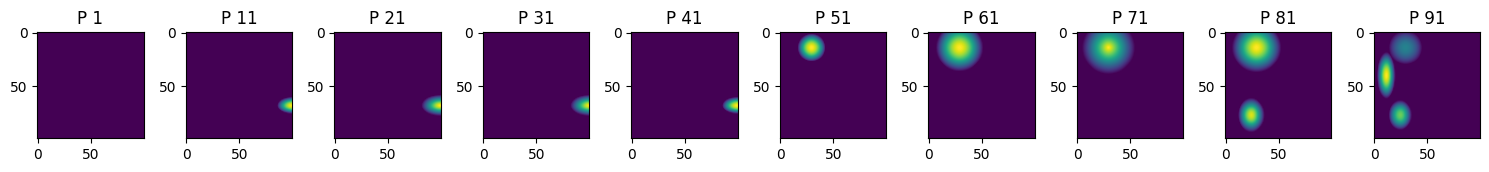

In [52]:
vis.visualize_X(bead.reshape((nx*ny*nz, 1)), nx, ny, nz, figsize=(15,15), planes_to_plot=range(0,nz,10))